# 4.Sorterings problematik

## 4.3 Egenskaber / attributer


**Trin 0**

Vi laster ned de nødvendige bibliotekene

In [ ]:
#@title download bibliotekker
!wget https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip  && unzip chromedriver_linux64



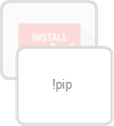



Vi installerer selenium 



```
!pip install selenium
```





In [ ]:
#@title installere chromium, driver, og selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver

**Trin 1**

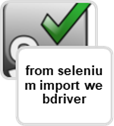


Deretter importerer vi biblioteket

In [ ]:
#@title installere selenium og initialisere webscraper
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
browser = webdriver.Chrome('chromedriver',options=options)
browser.get("https://portal.debio.no/certsearch/no")
#print(browser.page_source)  # results


**Trin 3**

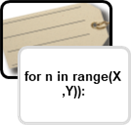

Vi laver et for loop. Vi iterere kun igjennem i udsnit av siderne. 

Vi lager en for-loop for deler av sidene.

```
for n in range(0,int(antal_sider)):
```

**Trin 4**


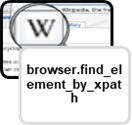

Vi identifiserer sidetallene

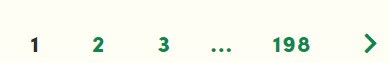


Henvisningen er som følger
```
browser.find_element_by_xpath("/html/body/app/div/ng-component/div/div[2]/div/div[3]/div/div/div/fab-certsearch-pagination/div/span["+str(n)+"]").click()

```

**Trin 5**

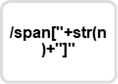

Ved å bruke en variabel kan vi iterer gjennom sidene
```
 browser.find_element_by_xpath("...["+str(n)+"]...").click()
``` 

**Trin 6**

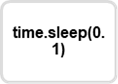


Vi ønsker at serveren ikke blir overbelastet

```
time.sleep(1)
```


**Trin 7**

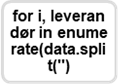


**Trin 8**

Vi deler teksten opp med  "SE SISTE GODKJENNING", slik at hver leverandørs informasjon blir skilt.

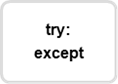


**Trin 9**

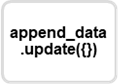


Til slutt, legges til informasjon individuelt.


In [ ]:
#@title leverandører data for givet side antal
import pandas as pd
antal_sider = 25 #@param {type:"slider", min:1, max:220, step:1}


#data=browser.find_element_by_class_name("resultWrapper").text

import time
database=[]

#pages=browser.find_element_by_class_name("csPaginatorWrapper").text

#last_page=pages.split()[-1]

for n in range(0,int(antal_sider)):
  try:
    browser.find_element_by_xpath("/html/body/app/div/ng-component/div/div[2]/div/div[3]/div/div/div/fab-certsearch-pagination/div/span["+str(n)+"]").click()
    time.sleep(3)
    print("success - " + str(n))
    data=browser.find_element_by_class_name("resultWrapper").text
    print(data)
    for i, leverandør in enumerate(data.split('SE SISTE GODKJENNING')):
      print(i)
      print(leverandør)
      append_data={}

      leverandører=leverandør.split('\n')
      if i==0:
        try:
          append_data.update({"navn": leverandører[0]})
          append_data.update({"addresse": leverandører[1]})
          append_data.update({"Org_nr": leverandører[2]})
          append_data.update({"Sektor": leverandører[3]})
        except:
          print("index mangler")
      if i>0:
        try:
          append_data.update({"godkjenning": leverandører[1]})
          append_data.update({"navn": leverandører[2]})
          append_data.update({"addresse": leverandører[3]})
          append_data.update({"Org_nr": leverandører[4]})
          append_data.update({"Sektor": leverandører[5]})
        except:
          print("index mangler")
      database.append(append_data)
  except:
    print("no success - " + str(n))
 
leverandør_database=pd.DataFrame(database)



no success - 0
no success - 1
success - 2
A. Nilsson & Co AS Fruktringen Oslo
Håndverksveien 31 , 1405 LANGHUS
Org. nr. 914 653 177
Foredling, import og omsetning
SE SISTE GODKJENNING
Gyldig fra 02.12.2020 til 30.12.2021
A. Strøm-Larsen AS
Vogtsgt 53 , 0477 OSLO
Org. nr. 933 112 993
Foredling, import og omsetning
SE SISTE GODKJENNING
Gyldig fra 09.09.2020 til 30.12.2021
A.C. Perch's Thehandel Norge AS
Kirkegata 5 , 0153 OSLO
Org. nr. 914 114 063
Foredling, import og omsetning
SE SISTE GODKJENNING
Gyldig fra 07.07.2020 til 30.12.2021
Aabakken Guro Karoline
Helgbustadveien 81 , 7243 KVENVÆR
Org. nr. 998 460 573
Foredling, import og omsetning
Økologisk landbruksproduksjon
SE SISTE GODKJENNING
Gyldig fra 02.11.2020 til 30.12.2021
Aalstad Amund
Olsrudvegen 33 , 2322 RIDABU
Org. nr. 992 932 074
Foredling, import og omsetning
Økologisk landbruksproduksjon
SE SISTE GODKJENNING
Gyldig fra 21.10.2020 til 30.12.2021
Aamo Jan Arvid
Vangrøftdalsveien 129 , 2550 OS I ØSTERDALEN
Org. nr. 993 019 410


Til sist kan vi se data over leverandører

In [ ]:
leverandør_database

,navn,addresse,Org_nr,Sektor,godkjenning
0,A. Nilsson & Co AS Fruktringen Oslo,"Håndverksveien 31 , 1405 LANGHUS",Org. nr. 914 653 177,"Foredling, import og omsetning",NaN
1,A. Strøm-Larsen AS,"Vogtsgt 53 , 0477 OSLO",Org. nr. 933 112 993,"Foredling, import og omsetning",Gyldig fra 02.12.2020 til 30.12.2021
2,A.C. Perch's Thehandel Norge AS,"Kirkegata 5 , 0153 OSLO",Org. nr. 914 114 063,"Foredling, import og omsetning",Gyldig fra 09.09.2020 til 30.12.2021
3,Aabakken Guro Karoline,"Helgbustadveien 81 , 7243 KVENVÆR",Org. nr. 998 460 573,"Foredling, import og omsetning",Gyldig fra 07.07.2020 til 30.12.2021
4,Aalstad Amund,"Olsrudvegen 33 , 2322 RIDABU",Org. nr. 992 932 074,"Foredling, import og omsetning",Gyldig fra 02.11.2020 til 30.12.2021
...,...,...,...,...,...
350,Bogen Bjørg,"Hemsedalsvegen 84 , 3550 GOL",Org. nr. 983 448 518,Økologisk landbruksproduksjon,Gyldig fra 09.09.2020 til 30.12.2021
351,Bogshamn Siw-Irene,"Haglandsvn. 145 , 5514 HAUGESUND",Org. nr. 976 942 817,Økologisk landbruksproduksjon,Gyldig fra 09.11.2020 til 30.12.2021
352,Bollingmo Jon,"Sørumsgata 101 , 3517 HØNEFOSS",Org. nr. 969 234 513,Økologisk landbruksproduksjon,Gyldig fra 14.12.2020 til 30.12.2021
353,Bolme Eivind,"Snøan-Strinde 7 , 7288 SOKNEDAL",Org. nr. 970 231 285,Økologisk landbruksproduksjon,Gyldig fra 21.04.2020 til 30.12.2021


Hvordan kan vi skape verdi med datasettet? og for hvilken målgruppe?